# get data

In [2]:
import sys
sys.path.append('scripts')
from data_generator import *
from regression_yb import *

In [3]:
RESULTS='/Volumes/BPlus/primeRec/results/'
DATA = '/Volumes/BPlus/primeRec/data/'

In [84]:
for SUBJ in ['sub02', 'sub19', 'sub21', 'sub22', 'sub23', 'sub24']:

    dg = DataGenerator(SUBJ, RESULTS, DATA)
    #info_list = dg.get_info_list()
    #lat_arr = dg.get_latent(info_list)
    #voxel_arr = dg.get_voxel(info_list)

    mask_enh, mask_sup = dg.get_sup_enh_mask( '%s/enhance_maskCut1_bin.nii.gz'%dg.mask_dir 
                                            , '%s/sup_maskCut1_bin.nii.gz'%dg.mask_dir)
    
    print('* %s :'%SUBJ, len(mask_enh[mask_enh==1]), len(mask_sup[mask_sup==1]))


* sub02 : 9188 8349
* sub19 : 4757 19692
* sub21 : 419 19779
* sub22 : 2769 24578
* sub23 : 4366 17028
* sub24 : 2262 21455


In [80]:
    # SAVE
    save_dir = '%s/%s/regression'%(RESULTS, SUBJ)    
    # x all
    x = dg.get_masked_voxel(voxel_arr)    
    np.save('%s/x_mask'%save_dir, x)
    # x enhance
    x[:, mask_enh==0]=0
    np.save('%s/x_enh'%save_dir, x)
    # x suppression
    x = dg.get_masked_voxel(voxel_arr)
    x[:, mask_sup==0]=0
    np.save('%s/x_sup'%save_dir, x)
    # y
    np.save('%s/y_arr'%save_dir, lat_arr)

4757 19692


In [117]:
x_sup.shape

(1000, 17540)

# Start regression and get Corr

In [119]:
#dic={'self_withzero':[], 'other_withzero':[], 'self_withoutzero':[], 'other_withoutzero':[]}

dic = { 'self_mask':[]
      , 'other_mask': []
      , 'self_sup':[]
      , 'other_sup':[]
      , 'self_enh':[]
      , 'other_enh':[]
      }

for SUBJ in ['sub02', 'sub19', 'sub21', 'sub22', 'sub23','sub24']:
    load_path = '%s/%s/regression'%(RESULTS, SUBJ)
    x = np.load('%s/x_mask.npy'%load_path)
    y = np.load('%s/y_arr.npy'%load_path)
    x_sup = np.load('%s/x_sup.npy'%load_path)
    x_enh = np.load('%s/x_enh.npy'%load_path)
    print(SUBJ, x.shape, y.shape, x_sup.shape, x_enh.shape)


    print('* Start regression : all')
    corr, self_mask, other_mask = regression_get_corr(x,y)
    print('* Start regression : suppression')
    corr, self_sup, other_sup = regression_get_corr(x_sup,y)
    print('* Start regression : enhancment')
    corr, self_enh, other_enh = regression_get_corr(x_enh,y)

    dic['self_mask'].append(np.mean(self_mask))
    dic['other_mask'].append(np.mean(other_mask))
    dic['self_sup'].append(np.mean(self_sup))
    dic['other_sup'].append(np.mean(other_sup))
    dic['self_enh'].append(np.mean(self_enh))
    dic['other_enh'].append(np.mean(other_enh))

sub02 (1000, 17540) (1000, 100) (1000, 17540) (1000, 17540)
* Start regression : all
0.1871607667985445 0.15205739380074326
0.2056761857135844 0.15958325132077264
0.2309484086064575 0.18081680360512906
0.1800697743812806 0.15835770327686624
0.15989728061125835 0.14561444094727666
0.21344214069783515 0.1903536759692428
0.21375614103837162 0.17920020654197297
0.18341719044107038 0.14898396291288252
0.19395665235252896 0.1652407484306911
0.20381520437588616 0.15986098726365328
* Start regression : suppression
0.14924152286419642 0.12594277062171957
0.17761010366828278 0.12028956532801144
0.17507347937892767 0.1412749866569043
0.15375661119153783 0.13394183910333582
0.13305056455103667 0.11357881992906214
0.19701864002492647 0.15604268448988748
0.18500031930370134 0.15161393039868284
0.1504337905815138 0.11057533937075413
0.17052976439950515 0.1300938561517705
0.16744868094644608 0.13521976899588697
* Start regression : enhancment
0.14039942283308368 0.1208616520825162
0.1446494972475854 0

other_mask 0.21247896664063826 0.17789847466068168
other_sup 0.20257071791636247 0.1681030405542412
other_enh 0.12099226440987275 0.1090629603206199


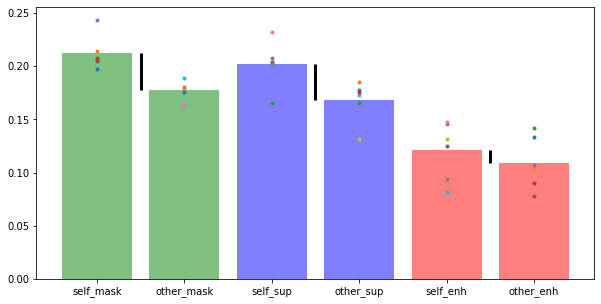

In [215]:
plt.figure(figsize=(10,5))
tmp_mean=0
c_list=['g','g', 'b','b','r','r']
for keyi, key in enumerate(dic.keys()):
    for i in range(6):
        plt.plot(key, dic[key][i], marker='.')
    
    if keyi%2!=0:
        
        diff = abs(tmp_mean-np.mean(dic[key]))
        print(key, tmp_mean, np.mean(dic[key]))
        
        plt.vlines(keyi-0.5, np.mean(dic[key]), np.mean(dic[key])+diff, 
                   linestyles='-', colors='k', linewidth=3,
                  )
        
        
    tmp_mean = np.mean(dic[key])
    plt.bar(key, tmp_mean, alpha=0.5, color=c_list[keyi])

In [123]:
dic.keys()

dict_keys(['self_mask', 'other_mask', 'self_sup', 'other_sup', 'self_enh', 'other_enh'])

# Before results

In [33]:
regression_process('sub21')

(1000, 100) (1000, 20198)
0.24677335013995158 0.20243538019141624
0.1904589239511496 0.15934156567803595
0.2082733134853766 0.19300538878957013
0.20680193800428587 0.17021743244514548
0.20822471535115508 0.17374615527309195
0.22352110670350864 0.18097707625662765
0.16840334415023472 0.15260818982681446
0.20463280520818233 0.183505679423554
0.20161499930740662 0.16572306729666275
0.22145315730176737 0.2024996864050678
* Mean:  0.20801576536030186 0.17840596215859866


In [34]:
regression_process('sub22')

(1000, 100) (1000, 27347)
0.19889642970291177 0.17658899321074392
0.23064028271267464 0.18663994863283337
0.2026919044457852 0.191080074006556
0.22530791200022318 0.19994010290252953
0.17450955886126768 0.1757699771301019
0.20041546867664947 0.18866169505314984
0.22975023025473948 0.20719153105035143
0.2021562232632305 0.19613038578895034
0.19524705335889553 0.17035312214062992
0.20802686431357284 0.19968256546870275
* Mean:  0.20676419275899502 0.1892038395384549


In [35]:
regression_process('sub23')

(1000, 100) (1000, 21395)
0.25032566591032734 0.17250031128545043
0.24074908744167267 0.1779538414794357
0.2318232113787796 0.1692300314597998
0.26928879533423555 0.1978144924222298
0.24938165572063084 0.1850253424459345
0.23160803044879733 0.17710322624048966
0.26029916989614393 0.16794782571261768
0.21345859652239663 0.156805057258255
0.24523123347340386 0.18409494237077084
0.243130506583305 0.1705231876016818
* Mean:  0.24352959527096923 0.17589982582766653


In [36]:
regression_process('sub24')

(1000, 100) (1000, 23717)
0.2020010553094862 0.18789764184404664
0.19690240975898923 0.17978640430506454
0.20487443759447344 0.17020147896400437
0.20497596061029824 0.16985753919357402
0.20448269587061993 0.18182201622728594
0.1850276302164123 0.16252846980892044
0.20192824136937426 0.1905257387903996
0.21901068861373857 0.18661472987437266
0.20288936589876438 0.17215733570368724
0.22811834589325997 0.19330447175327972
* Mean:  0.20502108311354167 0.1794695826464635
